# Erkunden der Daten

In diesem Kapitel befassen wir uns mit Methoden, die sie einsetzen können um ein Verständnis der Daten zu bekommen. Wenn sie innerhalb eines Projektes anfangen mit einem ihnen bisher unbekannten Datensatz zu arbeiten, müssen sie diese Daten erstmal *lernen*. Das heißt das Sie die Struktur, den Umfang (z.B. Größe und Anzahl von Datenpunkten), sowie den Wertebereich der Daten lernen müssen. Eventuell wird auch ein Verständnis der Datenquellen benötigt, wenn sie die Richtigkeit und Zuverlässigkeit der Daten relevant ist oder sie Gründe für unvollstände Daten näher beleuchten wollen. 

Es gibt sehr viele Methoden, die man zur Erkundung von Daten einsetzen kann. Die Erkundung selbst ist ein durch Werkzeuge unterstützer interaktiver Prozess, wobei es üblich ist verschiede Werkzeuge zu benutzen, basierend auf dem Aspekt den man aktuell erkunden möchte. Im Folgenden gehen wir einige wichtige Werkzeuge durch, die Ihnen helfen Daten zu verstehen. 

## Texteditoren und die Kommandozeile

Bereits sehr einfache Werkzeuge können ihnen helfen, die Daten zu verstehen. Texteditoren und einfache Kommandozeilenbefehle wie `head`, `more`, und `less` ermöglichen es sich den Inhalt Textdateien direkt anzusehen. Hierdurch kann man beliebige Daten, die nicht im Binärformat vorliegen, inspizieren. Das ist durchaus häufig der Fall, zum Beispiel bei *Comma-Separated Values* (CSV), der *eXtensible Markup Language* (XML), oder der *JavaScript Object Notation* (JSON). Wir könnten uns zum Beispiel direkt den Quelltext dieses Kapitels angucken, um das Format der Daten, die in Jupyter Notebooks gespeichert werden, zu verstehen:

In [1]:
!head kapitel_03.ipynb

{
 "cells": [
  {
   "cell_type": "markdown",
   "id": "empty-lender",
   "metadata": {},
   "source": [
    "# Erkunden der Daten\n",
    "\n",
    "In diesem Kapitel befassen wir uns mit Methoden, die sie einsetzen können um ein Verständnis der Daten zu bekommen. Wenn sie innerhalb eines Projektes anfangen mit einem ihnen bisher unbekannten Datensatz zu arbeiten, müssen sie diese Daten erstmal *lernen*. Das heißt das Sie die Struktur, den Umfang (z.B. Größe und Anzahl von Datenpunkten), sowie den Wertebereich der Daten lernen müssen. Eventuell wird auch ein Verständnis der Datenquellen benötigt, wenn sie die Richtigkeit und Zuverlässigkeit der Daten relevant ist oder sie Gründe für unvollstände Daten näher beleuchten wollen. \n",


Durch diesen einfachen Befehl, der nur die ersten Zeilen der Datei anzeigt, können wir viel über die Daten lernen: Die Daten sind im JSON Format als Liste von Zellen (`cells`) gespeichert. Für jede Zelle werden der Typ, eine Identifier, eventuelle Metadaten, sowie der Quelltext der Zelle als Liste gespeichert, wobei jeder Listeneintrag eine Zeile des Quelltextes ist. All das, nur mit einem einfachen Kommandozeilenbefehl. 

> **Bemerkung:**
>
> Man kann durch ein Ausrufezeichen als Präfix beliebige Kommandozeilenbefehle (z.B. bash) direkt aus einem Jupyter Notebook aufrufen. Daher ist `head` in einem Juypter Notebook äquivalent zur Eingabe von `head`direkt in der Kommandozeile. Welche Befehle zur Verfügung stehen, hängt von der Ausführungsumgebung ab. Weil die Kommandozeile von Windows den Befehl `head` nicht kennt, würde dies zum Beispiel eventuell nicht funktionieren. 

Dies ist natürlich nur eine Möglichkeit sich mit der Art wie Jupyter Notebooks Daten speichern zu betrachten. Und wie die meisten sehr einfachen Lösungen, gibt es natürlich auch schwächen. Es ist zum Beispiel nicht klar, ob es noch weitere Informationen gibt, die für Zellen gespeichert werden könnten, da der betrachtete Auszug eventuell nicht alle Möglichkeiten des Datenformats ausschöpft. Daher ist es auch wichtig, dass die Metadaten betrachtet werden, in diesem Fall das Dokumentation des Datenformats [^jupyterformat]. Dort findet man zum Bespiel raus, das es noch weitere Felder gibt, wie zum Beispiel das Feld `nbformat` um die Version des Datenformats anzuzeigen. Eine gute Dokumentation der Metadaten beschreibt das Datenformat vollständig, das heißt welche Felder es gibt, welche Informationen in einem Feld gespeichert werden, und wie die Felder zusammenhängen. 

Die Metadaten sind nicht notwendigerweise auf die Beschreibung der Daten selbst beschränkt. Es könnten zum Beispiel auch Links zu weiterführenden Informationen zur Verfügung gestellt werden. Außerdem könnten auch die Datenquellen beschrieben sein. Was man in den Metadaten überlicherweise nicht vorfindet ist eine Beschreibung der Werte, welche die Daten in einem Datensatz haben. Hier findet man höchstens Beispiele, die veranschaulichen welche Werte angenommen werden können. Dies ist ein Nachteil gegenüber der direkten Betrachtung der Daten, wobei die Erkenntisse über die Daten Werte der Daten, die man mit Hilfe eines Texteditors bekommen kann ebenfalls stark limitiert ist, gerade bei großen Datenmengen. Hierfür sind die Statistiken und Visualisierungen, die wir im Folgenden betrachten, deutlich besser geeignet. 

## Deskriptive Statistik

Die *deskriptive* Statistiik beschäftigt sich mit der Beschreibung von Eigenschaften eines Datensatzes durch einzelne, häufig numerische, Werte. Deskriptive Statistiken sollen nicht mit *induktiver* Statistik verwechselt werden, bei der es darum geht Eigenschaften von Daten vorherzusagen. Entsprechend sollte man nicht annehmen, dass deskriptive Statistiken für zuverlässige Vorhersagen von zukünftigen Werten geeignet sind. 

In diesem Kapitel betrachten wir die folgenden deskriptiven Statistiken: 
- Die *Lage* der Daten (engl. *central tendency*), durch das *artithmische Mittel*, den *Median*, und den *Modus*. 
- Die Variabilität der Daten, durch die *Standardabweichung*, den Interquartilsabstand* (IQR), und den *Median der absoluten Abweichung vom Median* (MAD). 
- Die Datenbereich (engl. *range*), durch das *Minimum* und *Maximum*. 

Es gibt noch viele weitere deskriptive Statistiken für die obigen Eigenschaften, die wir in diesem Kapitel nicht betrachten, zum Beispiel das harmonische Mittel für die Lage. Weiterhin gibt es noch weitere Eigenschaften, die sich durch deskriptive Statistiken erfassen lassen, zum Beispiel die *Form* (engl. *shape*) der Daten durch die *Kurtose* (Wölbung) und die *Schiefe* (engl. *skewness*). Diese gehen jedoch über die Betrachtungen dieses Kapitels hinaus und werden häufig auch nicht benötigt, insbesondere wenn man deskriptive Statistiken zusammen mit Visualisierungen benutzt. 

Im folgenden Benutzen wir die Notation $x = (x_1, ..., x_n)$ mit $x_1, ..., x_n \in \mathbb{R}$. Der Wert $x$ beschreibt also einen Vektor von reellen Zahlen. Wenn es sich bei $x$ um eine Teilmenge der möglichen Daten handelt, nennt man $x$ auch *Stichprobe* (engl. *sample*). Der Einfachheit halber können Sie sich $x$ auch einfach als Menge von Zahlen vorstellen. Dies ist zwar für die Vorstellung of einfacher, jedoch formal nicht korrekt, da Mengen nicht das gleiche Element mehrfach enthalten können, Datensätze jedoch schon.

### Lagemaße

Die Lage der Daten ist ein wichtiges statistisches Merkmal welches den *typischen Wert* im Zentrum der Daten beschreibt. Dies bedeutet nicht, das viele Datenpunkte exakt diesen Wert haben oder das man in der Zukunft erwarten könnte häufig diesen Wert zu beobachten. Stattdessen markiert die Lage die "Mitte" der Daten. Wenn Sie sich die Daten als Stadt vorstellen, markiert die Lage also nur den Mittelpunkt der Stadt. Das heißt jedoch nicht, dass dort besonders viele Häuser stehen. 

Es gibt verschiedene Wege die Lage von Daten zu definieren. Das *arithmetische Mittel* ist definiert als

$$mean(x) = \frac{1}{n}\sum_{i=1}^{n} x_i, x_i \in \mathbb{R},$$

also die Summe der Datenpunkte geteilt durch ihre Anzahl. Häufig spricht man auch einfach vom *Mittelwert* der Daten (engl. *mean*). Das arithmische Mittel ist eine gute Beschreibung der Lage, wenn die Daten normalverteilt oder gleichverteilt sind. Im Allgemeinen sollte man das arithmeische Mittel nur verwenden, wenn zwei Eigenschaften erfüllt sind:

1. Es gibt keine "lücken" in den Daten, also größere Bereiche in denen keine Werte liegen. Dies bedeutet insbesondere auch, dass die Daten keine Ausreißer haben sollten. 
2. Die Daten sind symmetrisch um das artithmetische Mittel verteilt, das heißt das die Verteilung links und rechts des artihmetischen Mittels ist in etwa gleich sein sollten.

Wenn diese Eigenschaften nicht erfüllt sind, sollte man das artithmetische Mittel nicht verwenden, da der Wert eventuell die Lage nicht gut beschreibt. Statistische Methoden, die derartige Annahmen an die Verteilung von Daten machen nennt man auch *parametrische* Statistiken. Wir werden uns später noch anhand von [Anscombes Quartet](#anscombes-quartet) sehen, wie die Werte von Statistiken irreführend sein können.

Eine alternative zum arithmetischen Mittel ist der *Median*, der definiert ist als

$$median(x) = \begin{cases}\bar{x}_{m} & \text{wenn}~n~\text{ungerade ist mit}~m=\frac{n+1}{2} \\ \frac{1}{2}(\bar{x}_{m}+\bar{x}_{m+1}) & \text{wenn}~n~\text{gerade ist mit}~m=\frac{n}{2},\end{cases}$$

wobei $\bar{x}$ eine nach der größe sortierter Vektor der Werte von $x$ ist. Entsprechend ist der Median wortwörtlich in der Mitte der der Daten: 50% der Daten sind kleiner oder gleich dem Median und 50% sind größer oder gleich dem Median. Im Gegensatz zum arithmetischen Mittel ist der Median eine *nicht parametrische* Statistik. Das bedeutet das der Median unabhängig von der Verteilung eingesetzt werden kann, zum Beispiel wenn die Annahmen an das arithmetische Mittel nicht erfüllt sind. Insbesondere ist der Median robust gegen Ausreißer, kann also nicht durch wenige besonders hohe oder niedrige Werte beeinflusst werden. 

Dies kann man sich auch an einem einfachen Beispiel verdeutlichen. Zuerst betrachten wir das arithmetische Mittel und den Median für Daten, bei denen die Annahmen des arithmetischen Mittels erfüllt sind:

In [2]:
import statistics  # we use the statistics from the Python standard library

data = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

print('mean:  ', statistics.mean(data))
print('median:', statistics.median(data))

mean:   7.500909090909091
median: 7.58


In diesem Beispiel sind die Werte vom Median und vom arithmetischen Mittel ähnlich und beide sind gut geeignet und die Lage zu beschreiben. Jetzt erweitern wir die Daten um einen einzelnen Ausreißer.

In [4]:
data.append(100)
print('mean:  ', statistics.mean(data))
print('median:', statistics.median(data))

mean:   15.209166666666667
median: 7.81


Durch den Ausreißer wird das arithmetische Mittel start beeinflusst, so dass es jetzt deutlich höher ist. Es ist sogar höher alls alle Datenpunkte, die wir ursprünglich betrachtet haben. Das ist offensichtlich keine gute Beschreibung der Mitte der Daten. Im Vergleich dazu, hat sich der Median kaum verändert und ist nur zum nächsthöheren Wert der sortieren Liste gesprungen. 

Möglicherweise fragen Sie sich jetzt, warum man überhaupt das arithmetische Mittel verwenden sollte, wenn der Median scheinbar aufgrund seiner Robustheit überlegen ist. Die Gründe hierfür kommen aus der Stochastik. Das arithmetische Mittel ist ein enger verwandt mit dem Erwartungswert von Zufallfsvariablen. Die Normalverteilung kann man vollständig durch den Mittelwert und die Standardabweichung beschreiben. Hieraus folgt, dass das arithmetische Mittel für die Normalverteilung der Beweisbar bestmögliche Schätzer für die Mitte der Daten ist. Trotzdem ist es ratsam den Median zu verwenden, wenn Sie die Verteilung der Daten nicht kennen oder Sie befürchten das es vielleicht Ausreißer gibt.

Das arithmetische Mittel und der Median sind nur für numerische Daten definiert. Es gibt jedoch auch nicht-numerische Daten. Die größe von Kleidungsstücken wird häufig in den Kategorien "Small", "Medium", und "Large" angegeben. Man spricht hierbei von kategorischen Daten (TODO ref Kapitel 4). Der *Modus* der Daten kann benutzt werden um die Lage von kategorischen Daten zu bestimmen. Der Modus ist definiert als der Wert, den man am häufigsten in einer Stichprobe $x$ beobachtet. 

In [5]:
data = ['small', 'medium', 'small', 'large', 'large', 'medium', 'medium']
print('mode:', statistics.mode(data))

mode: medium


Bitte beachten Sie, dass der Modus zwar gut für kategorische Daten (und manchmal auch für diskret Verteilte numerische Daten) geeignet ist, aber irreführend sein kann wenn die Daten *Bimodal* oder *Multimodal*, also wenn es mehrere "Mittelpunkte" gibt was sich dadurch äußert das mehrere Werte besonders häufig auftreten. Im Extremfall sind die kategorien gleichverteilt, also man hat gleich viele Beobachtungen pro Kategorie. Da jede Kategorie die gleiche Wahrscheinlichkeit hat, ist der Modus zufällig. Außerdem sollte man den Modus nicht für kontinuierliche numerische Daten benutzen, da es hier sehr unwahrscheinlich ist mehrfach den exakt gleichen Wert zu beobachten. 

### Variabilität

Die Variabilität misst wie stark die Daten verstreut sind. Eine kleine Varibilität heißt, dass sich viele Daten in der Nähe der Mitte befinden. Eine hohe Variabilität heißt dagegen, dass die Daten sich über einen großen Bereich verteilen. 

Das am häufigsten verwendete Maß für die Variabilität ist die *Standardabweichung*, die als

$$sd(x) = \sqrt{\frac{\sum_{i=1}^n (x_i-mean(x))^2}{n-1}}$$

definiert ist. Die Standardabweichung ist die Quadratwurzel des arithmetischen Mittels von der Abweichung der einzelnen Datenpunkte vom arithmetischen Mittel, nur dass bei der Standardabweichung durch $n-1$ statt $n$ geteilt wird. Der Grund hierfür sind die sogenannten *Freiheitsgrade*, auf die wir hier jedoch nicht näher eingehen. Auch wenn die Formulierung etwas kompliziert klingt, ist das Konzept einfach: Die Standardabweichung misst, wie stark die beobachteten Werte vom arithmetischen Mittel abweichen. Dadurch, dass die quadratischen Abweichungen betrachtet werden, beeinflussen große Abweichungen die Standardabweichung stärker als kleine Abweichungen. Da die Standardabweichung die Variabilität in Bezug auf das artihmetische Mittel misst, ist auch klar dass die Standardabweichung nur dann benutzt werden sollte, wenn das arithmetische Mittel eine geeignete Repräsentation für die Lage der Daten ist. Hierraus folgt auch, das die Standardabweichung ebenfalls ein parametrisches Maß für die Variabiltität ist. 

Ebenso wie es mit dem Median eine nicht-parametrisches Gegenstück zum arithmetischen Mittel gibt, gibt es auch nicht-parametrische Statistiken für die Variabilität. Der Interquartilsabstand (engl. *interquartile range*) is definiert als

$$IQR(X) = Q_{upper}-Q_{lower}$$

wobei $Q_{upper}$ und $Q_{lower}$ das obere und untere *Quartil* der Daten sind. Die Quartile sind Analog zum Metidn definiert, nur mit 75%, bzw. 25% der Daten: 75% der Daten sind kleiner oder gleich dem oberen Quartil und 25% der Daten sind kleiner oder gleich dem unteren Quartil. Entsprechend sind mindestens 50% der Daten größer oder gleich dem unteren Quartil und gleichzeitig kleiner oder gleich dem oberen Quartil. Der Interquartilsabstand misst also die größe des Bereichs, in dem sich die mittleren 50% der Daten befinden. 

Eine gute Faustregel ist, dass sie die Standabweichung nutzen sollten, wenn sie das artithmetische Mittel für die Lage benutzen, und den Interquartilsabstand wenn sie den Median betrachten. Hier ist ein Beispiel, was demonstriert wie sich die Probleme mit Ausreißern auch in der Standardabweichung wiederspiegeln.

In [6]:
from scipy import stats  # we use scipy for the IQR

data = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
print('Without outlier')
print('sd: ', statistics.stdev(data))
print('IQR:', stats.iqr(data))

data.append(100)
print('With outlier')
print('sd: ', statistics.stdev(data))
print('IQR:', stats.iqr(data))

Without outlier
sd:  2.031568135925815
IQR: 2.255000000000001
With outlier
sd:  26.77235292350312
IQR: 2.465


Obwohl bis auf einen Datenpunkt alle Daten zwischen 4,82 und 9,96 liegen, ist die Standardabweichung ein vielfaches von diesem Datenbereich, durch den einen ausreißer. Der Interquartilsabstand ist jedoch, ähnlich wie der Median, kaum beeinflusst. 

Wenn die Annahmen an die Standardabweichung erfüllt sind, ist es jedoch ein sehr gutes Maß für die Variabilität der Daten. Ähnlich wie beim arithmetische Mittel, ist dies insbesondere bei normalverteilten Daten der Fall, die sich durch diese beiden Maße komplett beschreiben lassen. Außerdem kann man für Normalverteilung beweisen, dass 68% der Daten nicht mehr als eine Standardabweichung vom arithmetischen Mittel entfernt sind, 95% der Daten nicht mehr als zwei Standardabweichungen, und 99.7% nicht mehr als 3 Standardabweichungen. Dies ist auch als 68-95-99,7 Regel bekannt. Für andere Verteilungen kann man ähnliche, wenn auch schwächere Aussagen über die Verteilung mit hilfe der Standardabweichung treffen. Die Chebychev-Ungleichung gilt für alle Verteilungen mit einem endlichen Erwartungswert (vereinfacht gesagt mit einem endlichen arithmetischen Mittel) und eine endlichen Varianz die nicht null ist. Die Varianz ist nichts anderes als das Quadrat der Standardabweichung. Aus der Chebychev-Ungleichung folgt das 50% der Daten nicht mehr als $\sqrt{2} \cdot std$ vom arithmetischen Mittel entfernt sind. Hierdurch ergibt sich auch ein direkter Zusammenhang zum Interquartilsabstand, der ebenfalls eine Aussage über die mittleren 50% der Daten ist. 

Bitte beachten Sie dass es für Variabilität für kategorische Daten hier nicht im Detail betrachten [^categorical]. Die Grundidee ist, das man sich anguckt, wie häufig Daten in den einzelnen Kategorien vorkommen und wie stark diese beobachtungen einer Gleichverteilung ähnlich sind. Je gleichmäßiger sich die Daten auf die Kategorien verteilen, desto höher die Variabiltität. 

### Datenbereich

Der Datenbereich gibt den Bereich an in dem Werte beobachtet werden können. Für numerische Daten ist dieser durch das Minimum (den kleinsten möglichen Wert) und das Maximum (den größten möglichen Wert) definiert. Beide kann Anhand einer Stichprobe $x$ schätzen, in dem den kleinsten und größten *beobachteten* Wert als $min$ und $max$ ermittelt. Die Differenz dieser Werte ist dann die größe des Datenbereichs

$$range = max-min.$$

Auch wenn diese statistischen Merkmale auf den ersten Blick trivial erscheinen, sind sie in der Praxis sehr hilfreich, insbesondere um Probleme mit den Daten zu bemerken. Wenn der Datenbereich nicht Plausibel ist, erkennt man zum Beispiel das es ungültige Werte gibt. Beobachtet man zum Beispiel ein Minimum von -1 bei einen Merkmal welches das Alter in Jahren angibt, könnte dies auf fehlende Werte hindeuten. Bei einem zu hohen Maximum könnte es fehler beim übertragen der Daten gegeben haben. Da ungülte Werte nicht notwendigerweise ausreißer sind, bemerkt man diese unter Umständen nicht, wenn man nur die Lage und die Variabilität von Daten betrachtet. 

## Visualisierung

Visualiserungen sind ein sehr mächtiges Werkzeug um etwas über Daten zu lernen und diese Verstehen.

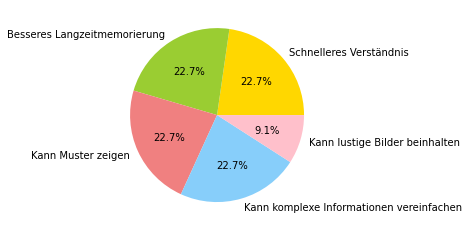

In [9]:
# we use matplotlib for the creation of visualizations
import matplotlib.pyplot as plt
%matplotlib inline

# Data to plot
labels = ['Schnelleres Verständnis', 'Besseres Langzeitmemorierung',
          'Kann Muster zeigen', 'Kann komplexe Informationen vereinfachen',
          'Kann lustige Bilder beinhalten']
sizes = [25, 25, 25, 25, 10]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink']

# Plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

Es gibt viele Vorteile von Visualisierungen gegenüber anderen Arten Daten darzustellen, zum Beispiel Tabellen oder deskriptiver Statistik. Im Allgemeine verarbeitet man visuelle Informationen schneller. Hierdurch kann man in der schneller etwas über die Daten lernen. Hinzu kommt das viele Menschen sich visualisierte Informationen besser merken können als zum Beispiel Text. Dies habe ich zum Beispiel auch oft selbst festgestellt: Studierende konnten sich in Prüfungen in der Regel (fast) alle die grafische Struktur von Diagrammen erinnern, obwohl sie die textuellen Annotation nicht wussten. 

Die Vorteile von Visualiserungen gehen jedoch über die Verarbeitungsgeschwindigkeit und die Memorisierung hinaus. Visualisierungen können auch ein Verständis der Daten ermöglichen, welches man andernfalls nicht erlangen könnten, zum Beispiel über Muster in Daten und komplexe zusammenhänge, die man sonst nicht sehen könnte. Hierfür betrachten wir das folgende Beispiel. Alice kennt Bob und Dan, Dan kennt Bob, Bob kennt Carol und Alace, und Carol kennt Alice, Bob und Dan. Diese textuelle Beschreibung ist sehr komplex und schwer zu folgen. Außerdem bekommt man kein intuitives Verständnis der Beziehung zwischen Alice, Bob, Carol und Dan. Jetzt betrachten wir das gleiche als gerichteten Graph:

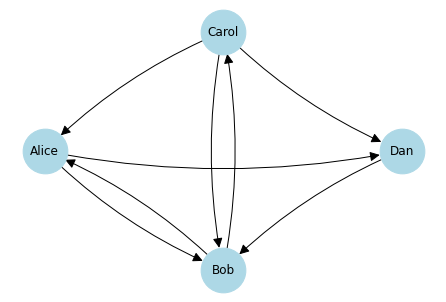

In [11]:
import networkx as nx  # networkx is a powerful library for working with graphs

# Create the graph by adding edges
# The vertices are implicitly defined through the endpoints of the edges
graph = nx.DiGraph()
graph.add_edge('Alice', 'Bob')
graph.add_edge('Alice', 'Dan')
graph.add_edge('Dan', 'Bob')
graph.add_edge('Bob', 'Carol')
graph.add_edge('Bob', 'Alice')
graph.add_edge('Carol', 'Alice')
graph.add_edge('Carol', 'Bob')
graph.add_edge('Carol', 'Dan')

# Plot the graph with a shell layout
nx.draw_shell(graph, with_labels=True, node_size=2000, node_color='lightblue',
              arrowsize=20, connectionstyle='arc3, rad = 0.1')

Diese Graph ist einfach zu lesen und gibt uns ein intuitives Verständnis der Beziehungen. Bitte beachten Sie, das wir bei allen Grafiken in diesem Kapitel Legenden und andere Details bewusst weglassen. Stattdessen generieren wir die Grafiken mit so möglichst wenig Quelltext, so dass sie trotzdem die gewünschten Erkenntnisse liefern. Der Grund hierfür ist, das wir hier Visualisierungen als Werkzeug zur Erkundung von Daten betrachten. Wenn wir Visualisierung für Texte (Bücher und sonstige Publikationen) oder Präsentation erstellt, sind andere Aspekte ebenfalls relevant, zum Beispiel die konsitente Beschriftung, Farbwahl, Legenden, und Titel. 

[^jupyterformat]: https://nbformat.readthedocs.io/en/latest/format_description.html
[^categorical]: https://doi.org/10.1080/10691898.2007.11889465

### Anscombe's Quartet

Anscombe's quartet is a famous example for how descriptive statistics may be misleading. The example is based on four different sets of data $(x_1, y_1), ..., (x_4, y_4)$ where with 11 values and for two variables $x_i$ and $y_i$, $i=1, ..., 4$.

| $x_{1,2,3}$ | $y_1$ | $y_2$ | $y_3$ | $x_4$ | $y_4$ |
|-------------|-------|-------|-------|-------|-------|
| 10          | 8.04  | 9.14  | 7.46  | 8     | 6.58  |
| 8           | 6.95  | 8.14  | 6.77  | 8     | 5.76  |
| 13          | 7.58  | 8.74  | 12.74 | 8     | 7.71  |
| 9           | 8.81  | 8.77  | 7.11  | 8     | 8.84  |
| 11          | 8.33  | 9.26  | 7.81  | 8     | 8.47  |
| 14          | 9.96  | 8.10  | 8.84  | 8     | 7.04  |
| 6           | 7.24  | 6.13  | 6.08  | 8     | 5.25  |
| 4           | 4.26  | 3.10  | 5.39  | 19    | 12.50 |
| 12          | 10.84 | 9.13  | 8.15  | 8     | 5.56  |
| 7           | 4.82  | 7.26  | 6.42  | 8     | 7.91  |
| 5           | 5.68  | 4.74  | 5.73  | 8     | 6.89  |

When we look at the data with descriptive statistics, they look very similar. 